In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('D:/ICTAK/dataset/Add_sales_data_2018.csv')
df.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


### 1. check whether there is any relationship between the amount spent for advertising through five different                      companies and profit generated.

<AxesSubplot:>

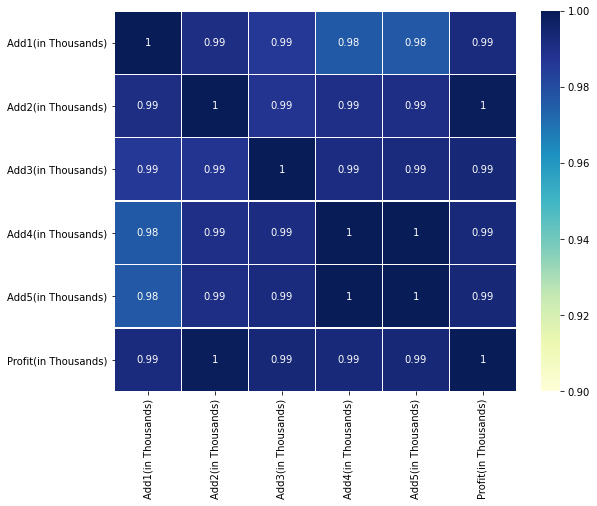

In [3]:
corrmatrix = df.corr()
plt.subplots(figsize=(9,7))
sns.heatmap(corrmatrix,vmin=.9,vmax=1,annot=True,linewidth=.5,cmap='YlGnBu')

###   Insight 
    The Features(money on ads for five different companies) have high correlation with Profit.ie more the                money spent on ads the more profit the textile company makes.

### 2.Build a regression model to predict the profit from the given data and comment your findings on it.

In [4]:
X = df[['Add1(in Thousands)','Add2(in Thousands)','Add3(in Thousands)','Add4(in Thousands)','Add5(in Thousands)']]
y = df['Profit(in Thousands)']

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [6]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression(normalize=True)

In [7]:
model = lin_reg.fit(X_train,y_train)

In [8]:
pred = model.predict(X_test)

In [9]:
from sklearn.metrics import mean_squared_error as MSE
print('MSE value is:',MSE(y_test,pred))

MSE value is: 4.842032853968942e-25


##### feature droping in this case increases the error as a results all features are selected for regression model training.

In [10]:
from sklearn.metrics import r2_score as r2
print(r2(y_test,pred))

1.0


### Insight      
       1.Mse value is close to 0 ie the value of prediction is close to actual value
       2.The R-squared value(coefficient of determination) is '1' implies regression predictions perfectly fit the data.

### 3.   Predict the profit generated by the company, if they wish to spend the following amount for advertisement.
         Add1(in Thousands) 290 
         Add2(in Thousands) 312 
         Add3(in Thousands) 309 
         Add4(in Thousands) 298 
         Add5(in Thousands) 320 

In [11]:
d ={ 'Add1(in Thousands)' :[290],
     'Add2(in Thousands)' :[312], 
     'Add3(in Thousands)' :[309],
     'Add4(in Thousands)' :[298],
     'Add5(in Thousands)' :[320] 
   }

df = pd.DataFrame.from_dict(d)
df

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands)
0,290,312,309,298,320


In [12]:
new_pred = model.predict(df)
print(new_pred)

[5820.06]


##### Insight
    Based on the model the predicted profit(in Thousands) for given ad budget(in Thousands) is: 5820.06